Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию, нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [24]:
import numpy as np

def linan(str1: str, str2: str) -> str:
  a11, a12, b1 = map(float, str1.strip().split())
  a21, a22, b2 = map(float, str2.strip().split())
  
  a = np.array([
    [a11, a12],
    [a21, a22]
  ])
  if a == np.array([[1, 0], [0, 1]]):
      raise "singular matrix"
  b = np.array([b1, b2])
  a_reversed = np.linalg.inv(a)
  answer = a_reversed @ b
  
  return np.array2string(answer, precision=5).strip("[]")

linan("1 2 3", "1 2 3")

LinAlgError: Singular matrix

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [16]:
def decorate_matrix(n: int) -> np.ndarray:
  matrix = np.zeros([n, n], dtype=int)
  matrix[0] = np.ones(n)
  matrix[n-1] = np.ones(n)
  
  matrix = matrix.transpose()
  matrix[0] = np.ones(n)
  matrix[n-1] = np.ones(n)
  return matrix

decorate_matrix(6)

array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1]])

Обратите внимание, что ожидается массив numpy

# Задание 3

1) реализуйте 2 функции:

$$f(x) = (x+a)^2 - b$$

$$g(x) = |f(x)|$$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [16]:
a = 3
b = 4

def f(x) -> float:
    return (x + a) ** 2 - b

def g(x) -> float:
    return abs(f(x))

def golden_section_method(f: callable, a: float, b: float, epsilon=1e-6) -> float:
    phi = (3 - 5**0.5)/2
    x1 = a + (b - a) * phi
    x2 = b - (b - a) * phi
    f1, f2 = f(x1), f(x2)
    while abs(b - a) > epsilon:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + (b - a) * phi
            f1, f2 = f(x1), f1
        else:
            a = x1
            x1 = x2
            x2 = b - (b - a) * phi
            f1, f2 = f2, f(x2)
    return round((a + b)/2, 4)

f_min = golden_section_method(f, -a, a)
g_min = golden_section_method(g, -a, a)
g2_min = golden_section_method(g, -2*a, -a)
print(f_min, g_min)

-3.0 -1.0


array([-5.00000001])

# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

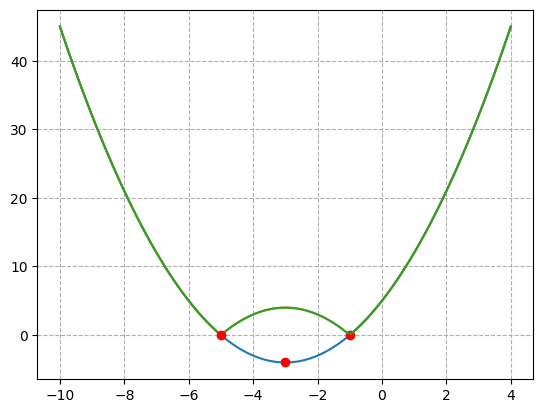

In [29]:
import matplotlib.pyplot as plt

def plot_function(func: callable, min: float, ):
    x = np.linspace(-10, 4, 100)
    y = list(map(func, x))
    
    plt.plot(x, y)
    plt.plot(min, func(min), "ro")
    plt.grid(ls="--")
    
plot_function(f, f_min)
plot_function(g, g_min)
plot_function(g, g2_min)

plt.show()


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

1) Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?   

Посчитаем вероятность нашего события для одного человека:
$$P_{10} = \frac{2}{2^{10}}$$
Теперь, используя схему бернулли, посчитаем вероятность того, что это событие не произойдёт ни разу за 1000 человек:
$$P(S_{1000} = 0) = C_{1000}^0 (\frac{2}{2^{10}})^0(1-\frac{2}{2^{10}})^{1000}$$
Вероятность же того, что хотя бы одному человеку выпадет 10 раз подряд орёл/решка будет равна:
$$P = 1 - P(S_{1000} = 0)$$

In [2]:
P = 1 - (1 - 2 / 2 ** 10) ** 1000
print(P)

0.858440454732242


2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?

В этом пункте у нас схожая схема, за исключением того, что для подсчёта вероятности события для одного человека нам нужно будет воспользоваться следующей формулой:
$$P_8 = \frac{\overline{C}_3^2} {2^{10}}$$
И уже эту посчитанную вероятность мы подставляем в схему бернулли

In [4]:
P = 1 - (1 - 6 / 2 ** 10) ** 1000
print(P)

0.9971957200884372


3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

Тут задача предельно проста. Нам всего лишь нужно расписать схему Бернулли для трёх успехов вместо ни одного:
$$P(S_{1000} = 3) = C_{1000}^3 (\frac{2}{2^{10}})^3(1-\frac{2}{2^{10}})^{997}$$ 

In [10]:
P = 333 * 500 * 998 * (2 / 2 ** 10) ** 3 * (1 - 2 / 2 ** 10) ** 997
print(P)

0.1762873858121736
